In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
pd.set_option('display.max_rows', 100)  # You can increase this number as needed

In [2]:
# Load dataset
df = pd.read_csv('../data/ames_transactions__2_.csv')

df.head()

,property_id,dwelling_subclass,zoning_type,lot_frontage_ft,lot_area_sq_ft,street_type,alley_type,lot_shape,land_contour,utilities,...,fence_quality_rating,misc_feature,misc_value,month_sold,year_sold,sale_type,sale_condition,sale_price,longitude,latitude
0,0526301100,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,141,31770,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,...,No_Fence,NaN,0,5,2010,WD,Normal,215000,-93.619754,42.054035
1,0526350040,One_Story_1946_and_Newer_All_Styles,Residential_High_Density,80,11622,Pave,No_Alley_Access,Regular,Lvl,AllPub,...,Minimum_Privacy,NaN,0,6,2010,WD,Normal,105000,-93.619756,42.053014
2,0526351010,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,81,14267,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,...,No_Fence,Gar2,12500,6,2010,WD,Normal,172000,-93.619387,42.052659
3,0526353030,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,93,11160,Pave,No_Alley_Access,Regular,Lvl,AllPub,...,No_Fence,NaN,0,4,2010,WD,Normal,244000,-93.617320,42.051245
4,0527105010,Two_Story_1946_and_Newer,Residential_Low_Density,74,13830,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,...,Minimum_Privacy,NaN,0,3,2010,WD,Normal,189900,-93.638933,42.060899


In [3]:
# Number of data samples and features
print("Number of data samples:", df.shape[0])
print("Number of features:", df.shape[1])

#The data has 82 columns which include 
# 23 nominal, 
# 23 ordinal, 
# 14 discrete, 
# and 20 continuous variables 
# (and 2 additional observation identifiers)

Number of data samples: 2930
Number of features: 82


In [49]:
summary = []

for col in df.columns:
    dtype = df[col].dtype
    unique_count = df[col].nunique()
    null_count = df[col].isnull().sum()
    top_vals = df[col].value_counts().head(4)
    
    # Fill with NaN if less than 4 unique values
    top_keys = list(top_vals.index) + [None] * (4 - len(top_vals))
    top_counts = list(top_vals.values) + [None] * (4 - len(top_vals))

    summary.append({
        'Column': col,
        'Dtype': dtype,
        'Unique': unique_count,
        'Nulls': null_count,
        'Top1': top_keys[0],
        'Top1_Count': top_counts[0],
        'Top2': top_keys[1],
        'Top2_Count': top_counts[1],
        'Top3': top_keys[2],
        'Top3_Count': top_counts[2],
        'Top4': top_keys[3],
        'Top4_Count': top_counts[3],
    })

summary_df = pd.DataFrame(summary)

# Optional: show more rows if needed
pd.set_option('display.max_rows', 200)
display(summary_df)


,Column,Dtype,Unique,Nulls,Top1,Top1_Count,Top2,Top2_Count,Top3,Top3_Count,Top4,Top4_Count
0,property_id,object,2930,0,0526301100,1,0535375130,1,0535378080,1.0,0535379060,1.0
1,dwelling_subclass,object,16,0,One_Story_1946_and_Newer_All_Styles,1079,Two_Story_1946_and_Newer,575,One_and_Half_Story_Finished_All_Ages,287.0,One_Story_PUD_1946_and_Newer,192.0
2,zoning_type,object,7,0,Residential_Low_Density,2273,Residential_Medium_Density,462,Floating_Village_Residential,139.0,Residential_High_Density,27.0
3,lot_frontage_ft,int64,129,0,0,490,60,276,80,137.0,70,133.0
4,lot_area_sq_ft,int64,1960,0,9600,44,7200,43,6000,34.0,9000,29.0
5,street_type,object,2,0,Pave,2918,Grvl,12,None,NaN,None,NaN
6,alley_type,object,3,0,No_Alley_Access,2732,Gravel,120,Paved,78.0,None,NaN
7,lot_shape,object,4,0,Regular,1859,Slightly_Irregular,979,Moderately_Irregular,76.0,Irregular,16.0
8,land_contour,object,4,0,Lvl,2633,HLS,120,Bnk,117.0,Low,60.0
9,utilities,object,3,0,AllPub,2927,NoSewr,2,NoSeWa,1.0,None,NaN


In [50]:

# Statistical summary of the dataset

print("Statistical Summary:")

df.describe().transpose()

Statistical Summary:


,count,mean,std,min,25%,50%,75%,max
lot_frontage_ft,2930.0,57.647782,33.499441,0.000000,43.000000,63.000000,78.000000,313.000000
lot_area_sq_ft,2930.0,10147.921843,7880.017759,1300.000000,7440.250000,9436.500000,11555.250000,215245.000000
year_built,2930.0,1971.356314,30.245361,1872.000000,1954.000000,1973.000000,2001.000000,2010.000000
year_remod_add,2930.0,1984.266553,20.860286,1950.000000,1965.000000,1993.000000,2004.000000,2010.000000
masonry_veneer_area_sq_ft,2930.0,101.096928,178.634545,0.000000,0.000000,0.000000,162.750000,1600.000000
bsmt_fin_type_1_sq_ft,2930.0,442.478498,455.586452,0.000000,0.000000,370.000000,734.000000,5644.000000
bsmt_fin_type_2_sq_ft,2930.0,49.705461,169.142089,0.000000,0.000000,0.000000,0.000000,1526.000000
bsmt_unf_sq_ft,2930.0,559.071672,439.540571,0.000000,219.000000,465.500000,801.750000,2336.000000
total_bsmt_sq_ft,2930.0,1051.255631,440.968018,0.000000,793.000000,990.000000,1301.500000,6110.000000
first_flr_sq_ft,2930.0,1159.557679,391.890885,334.000000,876.250000,1084.000000,1384.000000,5095.000000


In [5]:
# columns that have most null values
summary_df.sort_values(by='Nulls',ascending=False)

,Column,Dtype,Unique,Nulls,Top1,Top1_Count,Top2,Top2_Count,Top3,Top3_Count,Top4,Top4_Count
73,misc_feature,object,5,2824,Shed,95,Gar2,5,Othr,4.0,Elev,1.0
25,masonry_veneer_type,object,4,1775,BrkFace,880,Stone,249,BrkCmn,25.0,CBlock,1.0
0,property_id,object,2930,0,0526301100,1,0535375130,1,0535378080,1.0,0535379060,1.0
52,kitchen_abv_grd_count,int64,4,0,1,2796,2,129,0,3.0,3,2.0
59,garage_finish_rating,object,4,0,Unf,1231,RFn,812,Fin,728.0,No_Garage,159.0
58,garage_type,object,7,0,Attchd,1731,Detchd,782,BuiltIn,186.0,No_Garage,157.0
57,fireplace_quality_rating,object,6,0,No_Fireplace,1422,Good,744,Typical,600.0,Fair,75.0
56,fireplace_count,int64,5,0,0,1422,1,1274,2,221.0,3,12.0
55,functionality_type,object,8,0,Typ,2728,Min2,70,Min1,65.0,Mod,35.0
54,room_abv_grd_count,int64,14,0,6,844,7,649,5,586.0,8,347.0


## not many null values as in the original Ames dataset

In [6]:
# check skewed numeric columns
for column in df.columns:
  if pd.api.types.is_numeric_dtype(df[column]):  # Check if the column is numeric
    skew_value = df[column].skew()  # Calculate skewness
    print(f"Skewness of {column}: {skew_value}")

Skewness of lot_frontage_ft: 0.025064195225539883
Skewness of lot_area_sq_ft: 12.820898171092681
Skewness of year_built: -0.6044622213681587
Skewness of year_remod_add: -0.4518626526946543
Skewness of masonry_veneer_area_sq_ft: 2.619305130254233
Skewness of bsmt_fin_type_1_sq_ft: 1.4164214051032356
Skewness of bsmt_fin_type_2_sq_ft: 4.140793742804167
Skewness of bsmt_unf_sq_ft: 0.9230449784991075
Skewness of total_bsmt_sq_ft: 1.1508459539373848
Skewness of first_flr_sq_ft: 1.4694286403471462
Skewness of second_flr_sq_ft: 0.8664567507736957
Skewness of low_quality_fin_sq_ft: 12.118161563533523
Skewness of gr_living_area_sq_ft: 1.2741097164955077
Skewness of bsmt_full_bath_count: 0.6177277112577007
Skewness of bsmt_half_bath_count: 3.94238925336353
Skewness of full_bath_count: 0.17195207751092292
Skewness of half_bath_count: 0.6977130658109044
Skewness of bedroom_abv_grd_count: 0.30569421135922614
Skewness of kitchen_abv_grd_count: 4.313824595352703
Skewness of room_abv_grd_count: 0.7535

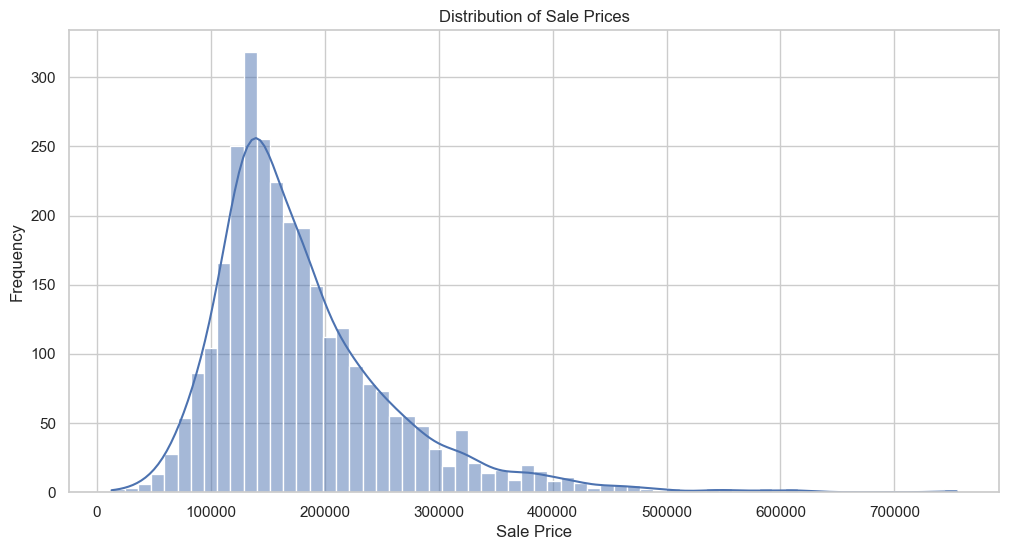

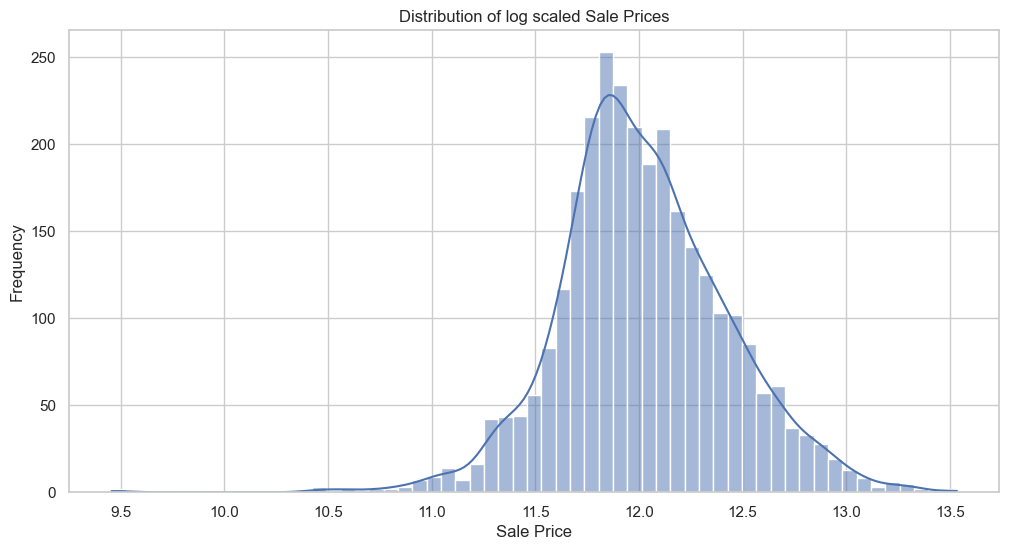

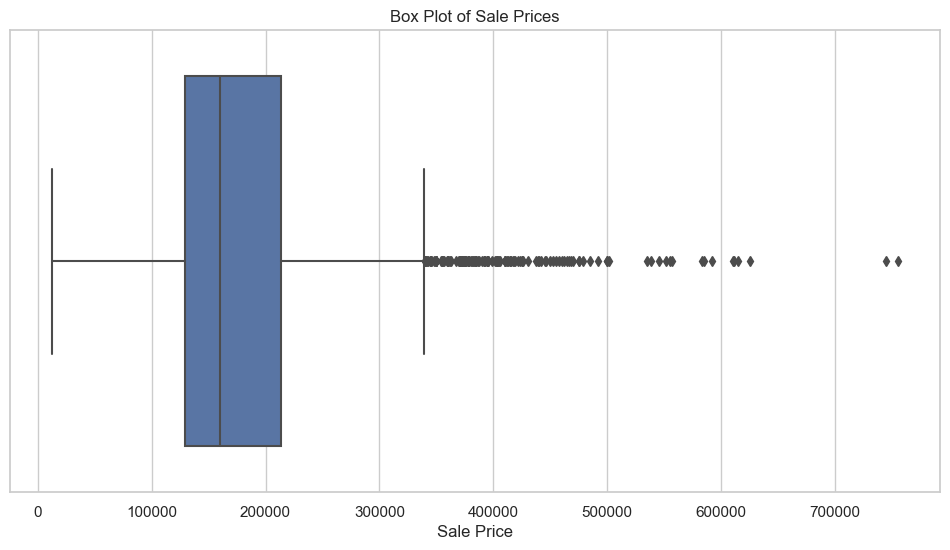

In [7]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Histogram of Sale Prices
plt.figure(figsize=(12, 6))
sns.histplot(df['sale_price'], kde=True)
plt.title('Distribution of Sale Prices')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()

# Histogram of log scaled Sale Prices
plt.figure(figsize=(12, 6))
sns.histplot(np.log1p(df['sale_price']), kde=True)
plt.title('Distribution of log scaled Sale Prices')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()

# Box Plot of Sale Prices
plt.figure(figsize=(12, 6))
sns.boxplot(x='sale_price', data=df)
plt.title('Box Plot of Sale Prices')
plt.xlabel('Sale Price')
plt.show()

# observations
- the sales price is skewed towards right.
- log-transform reveals a more Gaussian shape, better for regression.
- most of the properties are priced below 350k
- might be a problem predicting for properties whose values might be more that 350K.

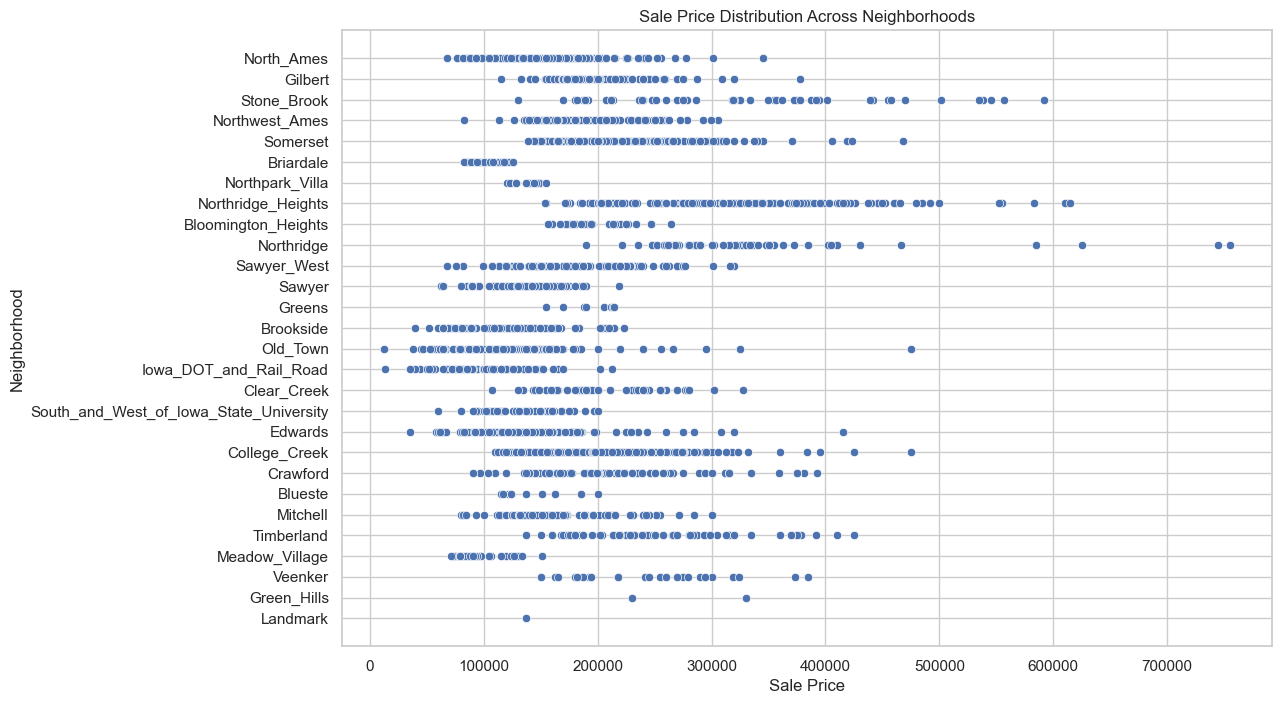

In [8]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='sale_price', y='neighborhood', data=df)
plt.title('Sale Price Distribution Across Neighborhoods')
plt.ylabel('Neighborhood')
plt.xlabel('Sale Price')
plt.xticks(rotation=0)  # Rotate the x-axis labels for better visibility
plt.show()

# observations
- some neighbourhoods like Northridge have more premium properties
- Old town seems to have some lower value properties

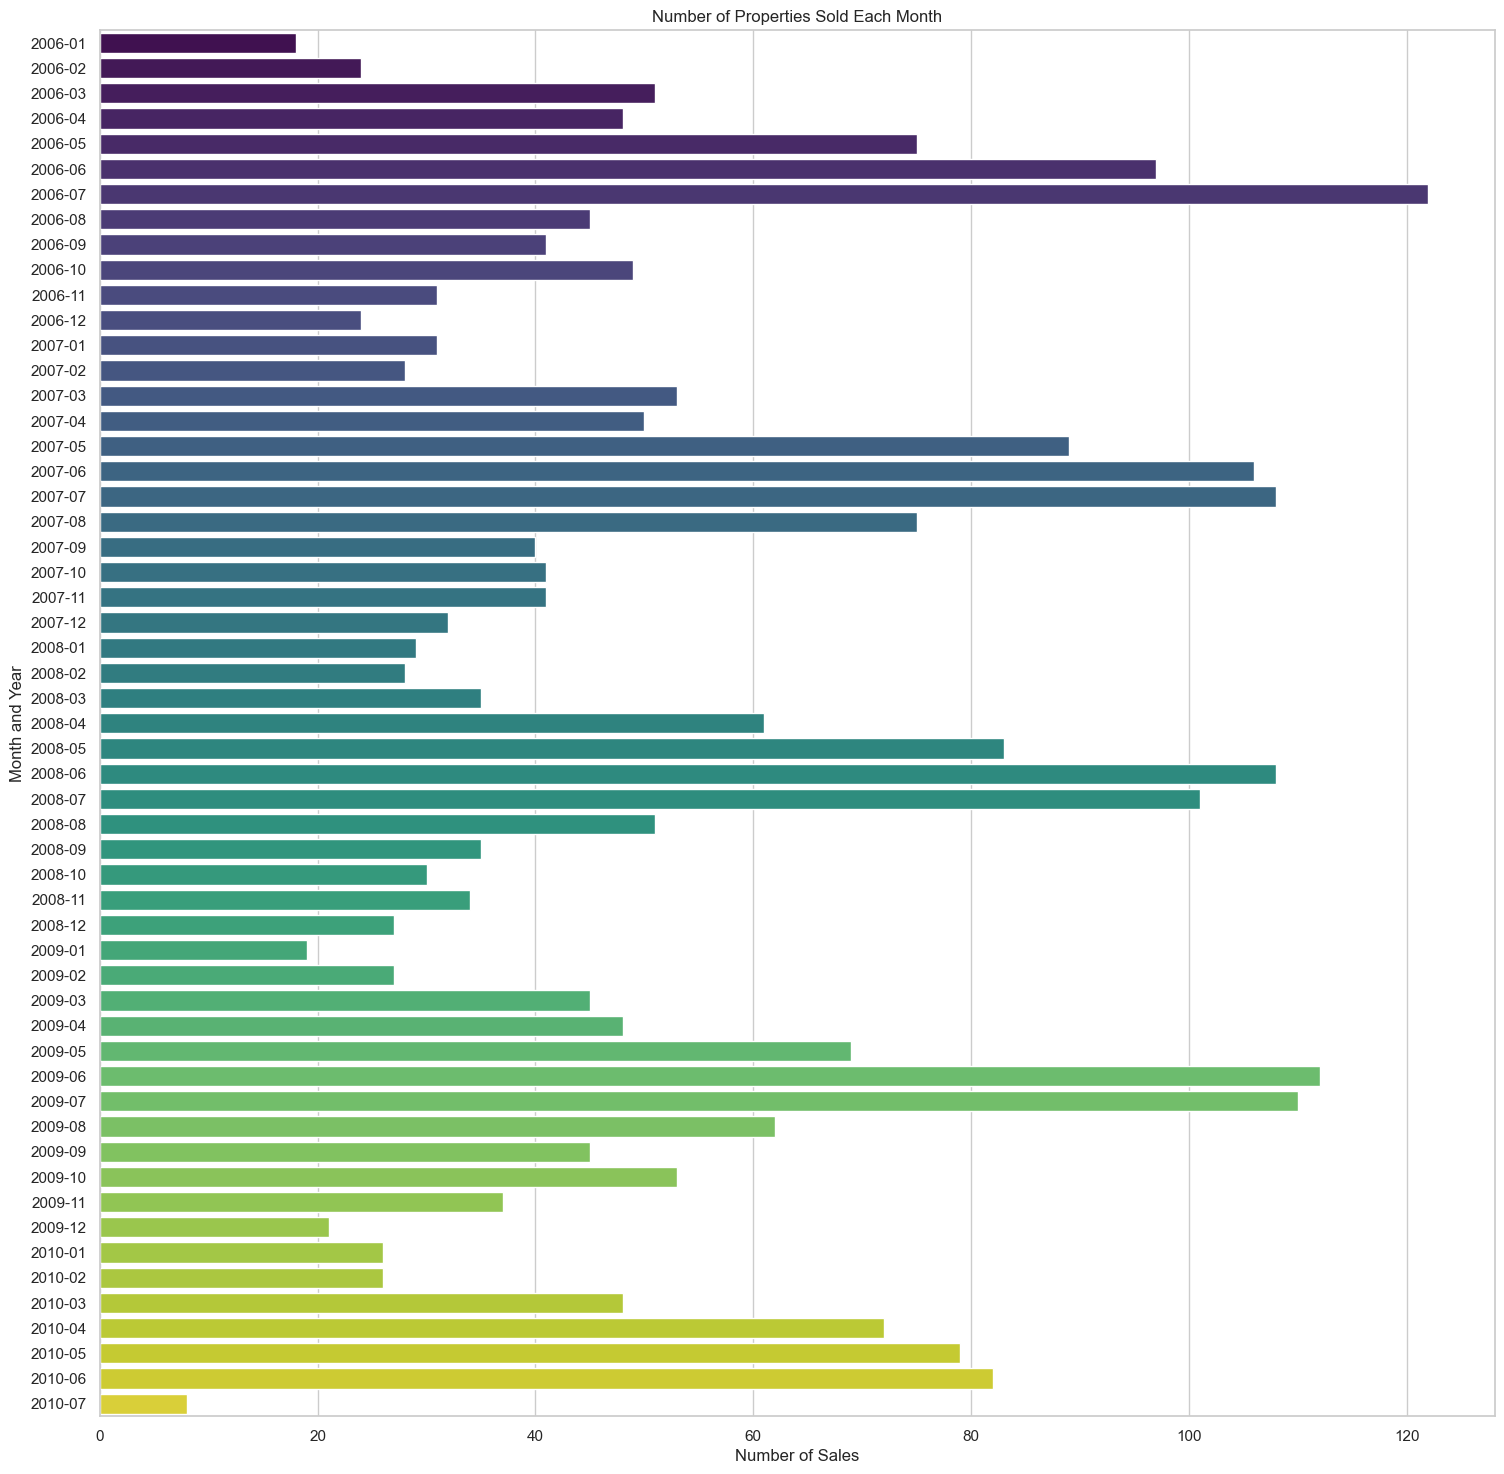

In [9]:
df['year_month'] = df['year_sold'].astype(str) + '-' + df['month_sold'].astype(str).str.zfill(2)

# Count the number of sales per 'Year_Month'
monthly_sales = df['year_month'].value_counts().sort_index()

# Plotting the bar graph
plt.figure(figsize=(18, 18))
sns.barplot(y=monthly_sales.index, x=monthly_sales.values, palette="viridis")
plt.title('Number of Properties Sold Each Month')
plt.ylabel('Month and Year')
plt.xlabel('Number of Sales')
plt.xticks(rotation=0)  # Rotate the labels for better visibility
plt.show()

# observations
- most properties sales occur during mid year
- around june-july
- sales have also dropped from 2006 to 2010
- probably due to subprime mortgage crisis of 2008

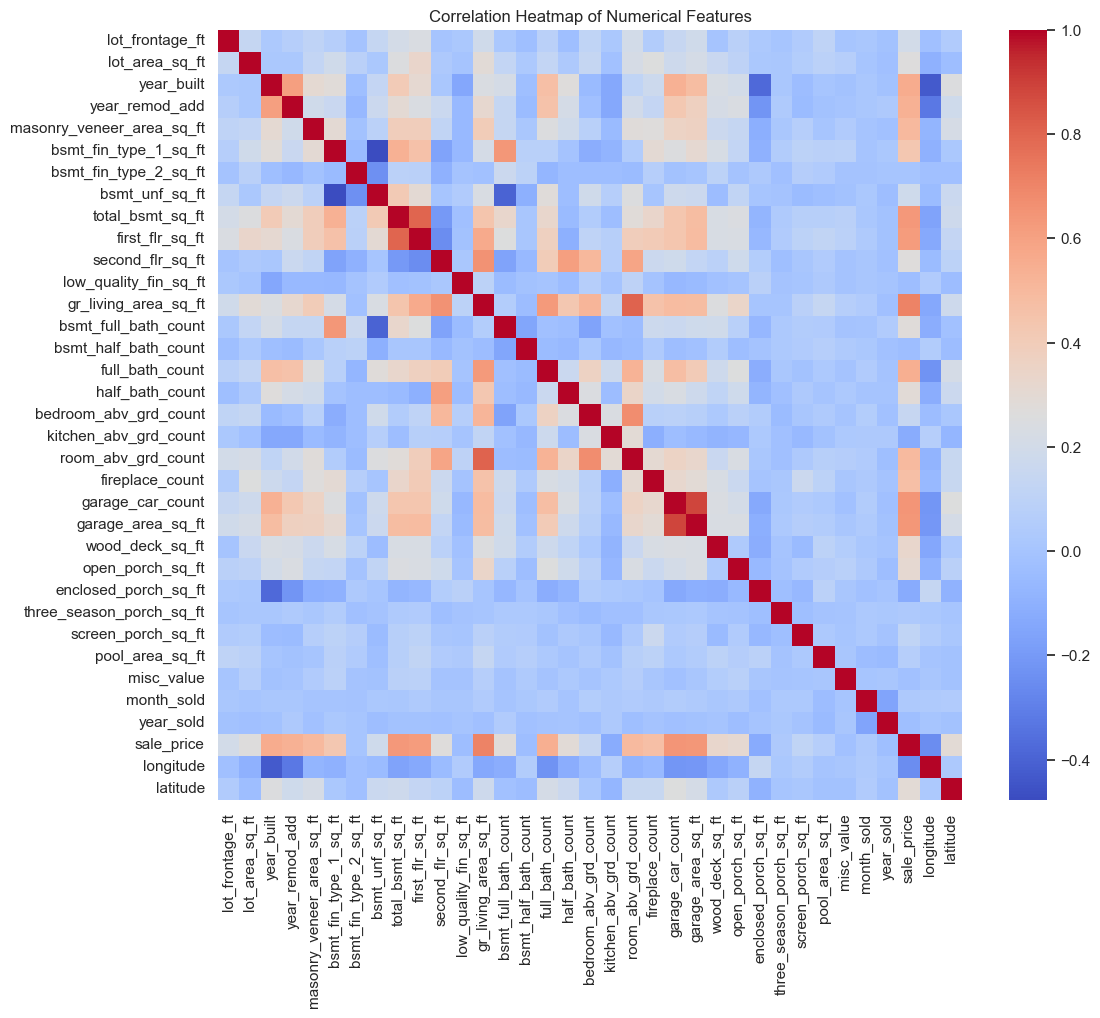

In [11]:
# Calculate the correlation matrix
corr = df.select_dtypes(include=['number']).corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap
sns.heatmap(corr, annot=False, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

# observations
- sale price seems to be most correlated to:
- - garage size and garage car count
- - living area sqft
- - number of bathrooms
- - age of building

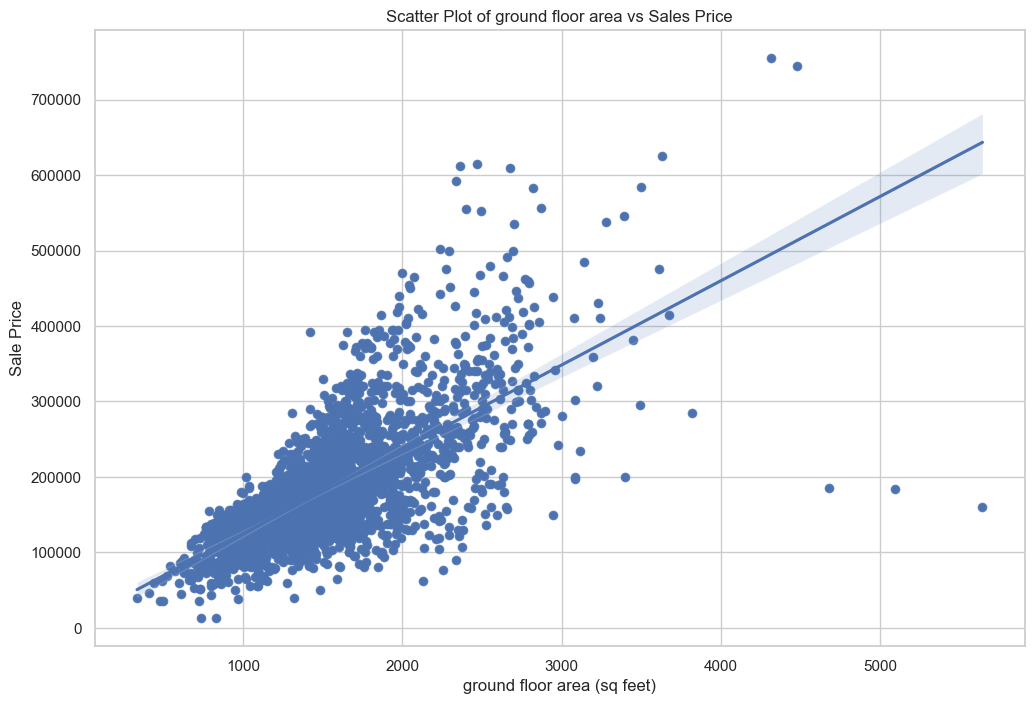

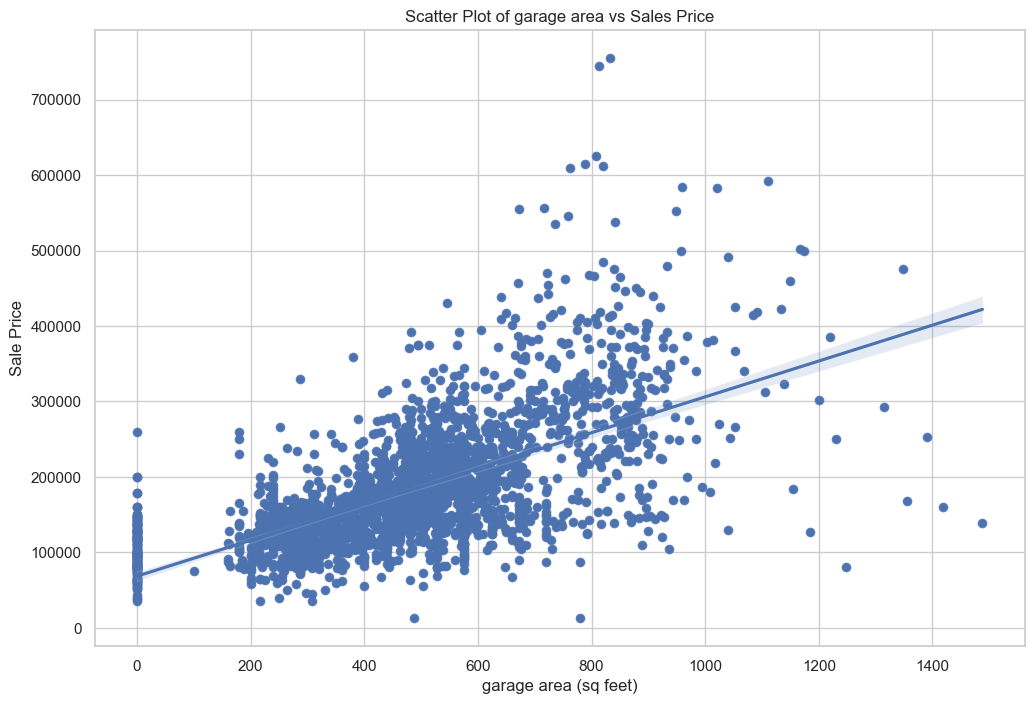

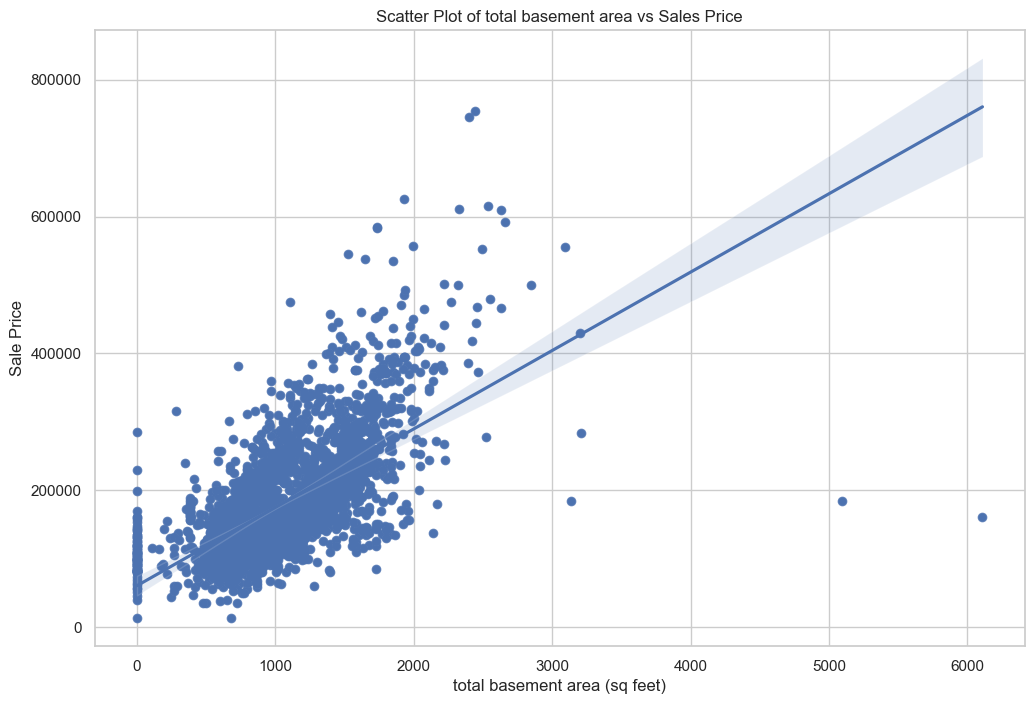

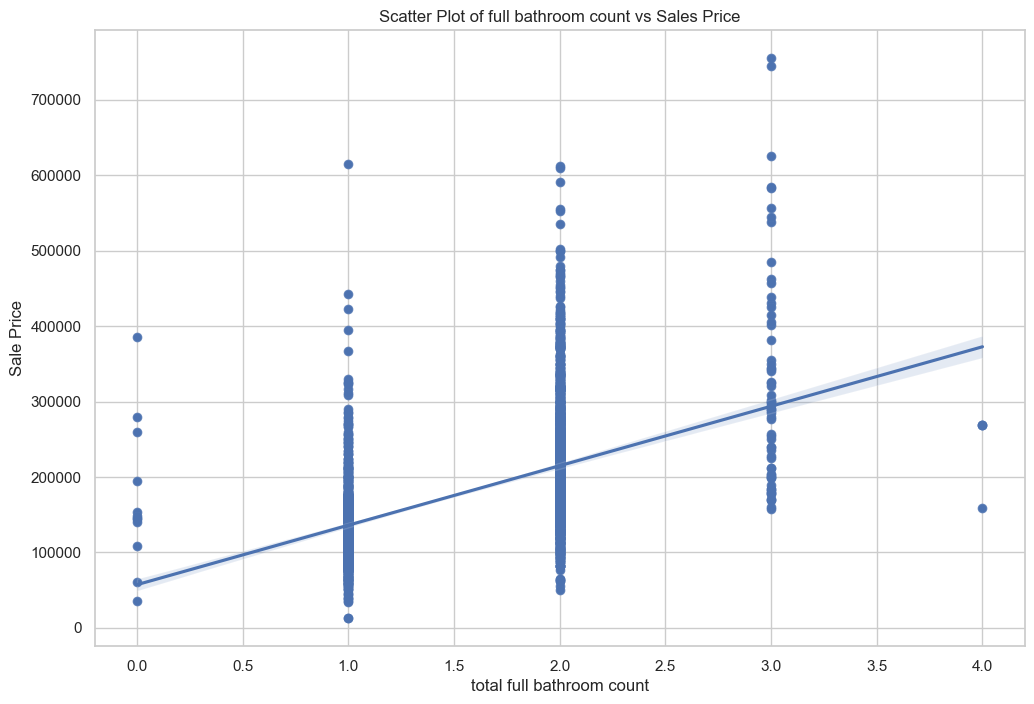

In [25]:
sns.set(style="whitegrid")

# Scatter Plot of Lot Frontage vs Lot Area
plt.figure(figsize=(12, 8))
sns.scatterplot(x='gr_living_area_sq_ft', y='sale_price', data=df)
sns.regplot(x='gr_living_area_sq_ft', y='sale_price', data=df)
plt.title('Scatter Plot of ground floor area vs Sales Price')
plt.xlabel('ground floor area (sq feet)')
plt.ylabel('Sale Price')
plt.show()

# Scatter Plot of Lot Frontage vs Lot Area
plt.figure(figsize=(12, 8))
sns.scatterplot(x='garage_area_sq_ft', y='sale_price', data=df)
sns.regplot(x='garage_area_sq_ft', y='sale_price', data=df)
plt.title('Scatter Plot of garage area vs Sales Price')
plt.xlabel('garage area (sq feet)')
plt.ylabel('Sale Price')
plt.show()

# Scatter Plot of Lot Frontage vs Lot Area
plt.figure(figsize=(12, 8))
sns.scatterplot(x='total_bsmt_sq_ft', y='sale_price', data=df)
sns.regplot(x='total_bsmt_sq_ft', y='sale_price', data=df)
plt.title('Scatter Plot of total basement area vs Sales Price')
plt.xlabel('total basement area (sq feet)')
plt.ylabel('Sale Price')
plt.show()

# Scatter Plot of Lot Frontage vs Lot Area
plt.figure(figsize=(12, 8))
sns.scatterplot(x='full_bath_count', y='sale_price', data=df)
sns.regplot(x='full_bath_count', y='sale_price', data=df)
plt.title('Scatter Plot of full bathroom count vs Sales Price')
plt.xlabel('total full bathroom count')
plt.ylabel('Sale Price')
plt.show()

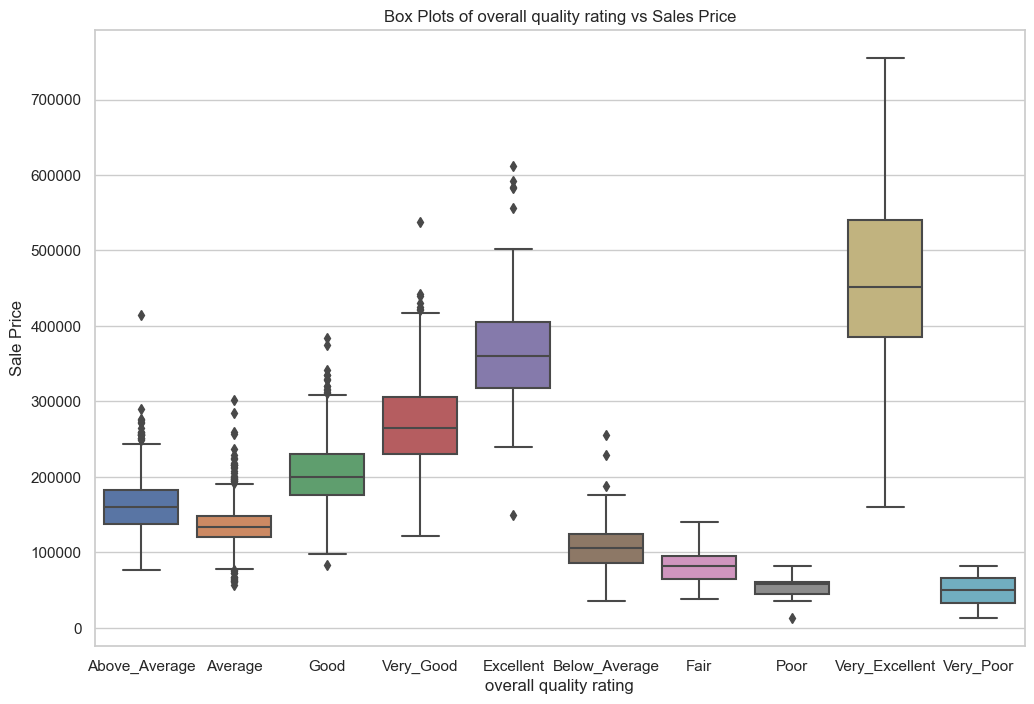

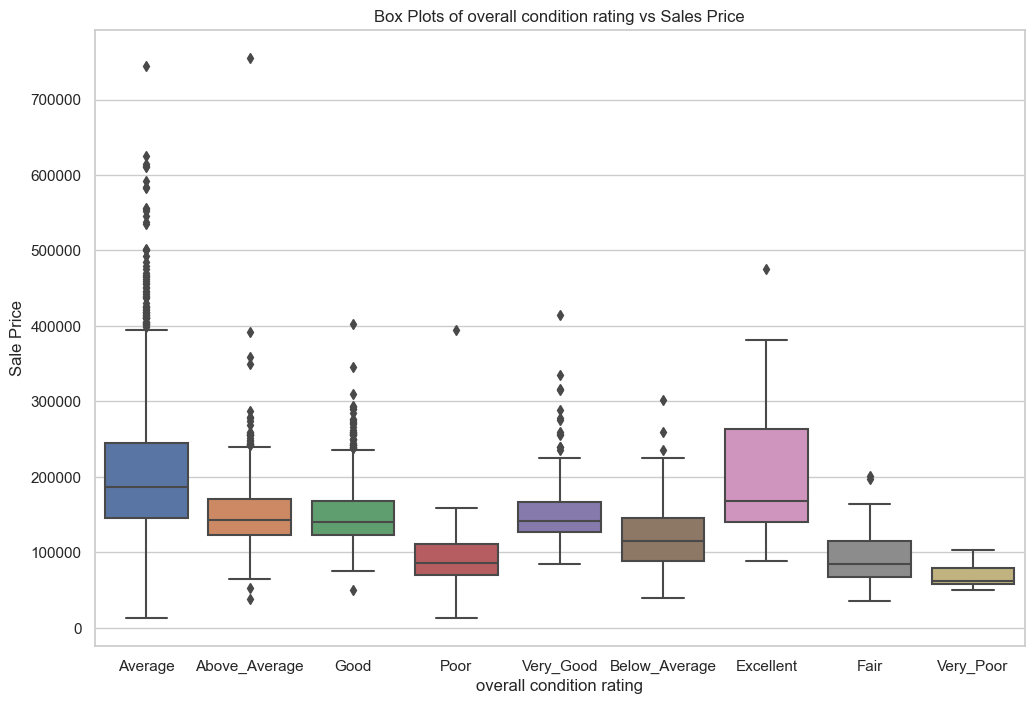

In [29]:

sns.set(style="whitegrid")

# Box Plots of overall quality rating vs Sales Price
plt.figure(figsize=(12, 8))
sns.boxplot(x='overall_quality_rating', y='sale_price', data=df)
plt.title('Box Plots of overall quality rating vs Sales Price')
plt.xlabel('overall quality rating')
plt.ylabel('Sale Price')
plt.show()

# Box Plots of overall condition rating vs Sales Price
plt.figure(figsize=(12, 8))
sns.boxplot(x='overall_condition_rating', y='sale_price', data=df)
plt.title('Box Plots of overall condition rating vs Sales Price')
plt.xlabel('overall condition rating')
plt.ylabel('Sale Price')
plt.show()

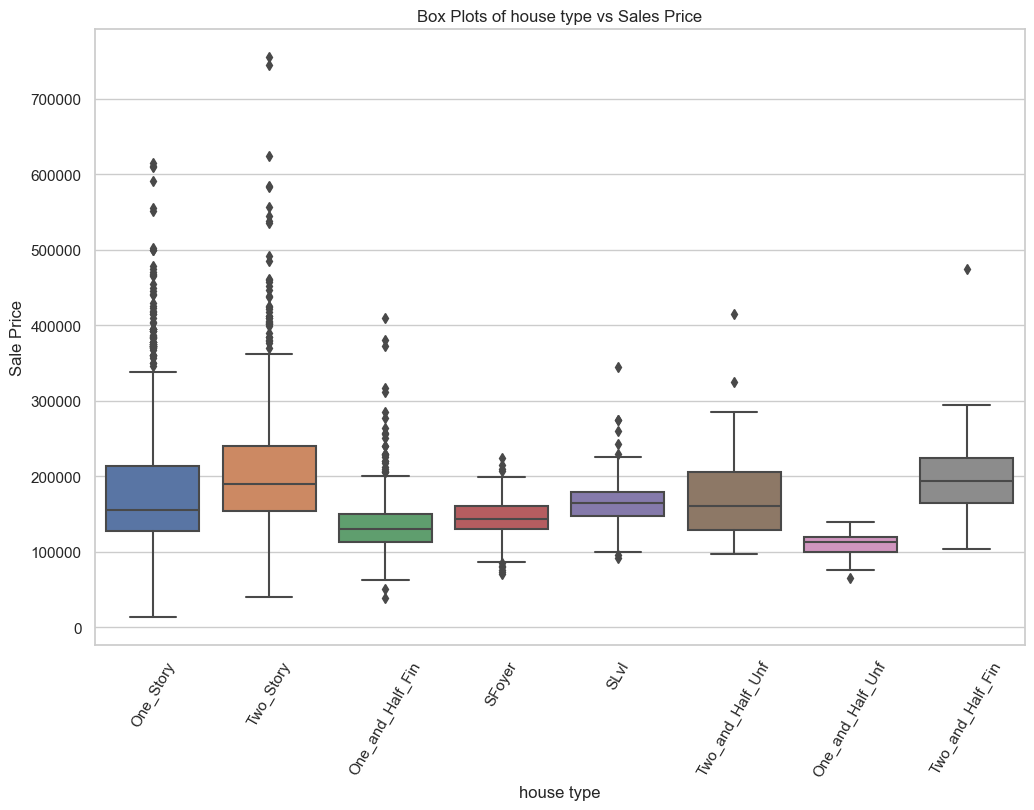

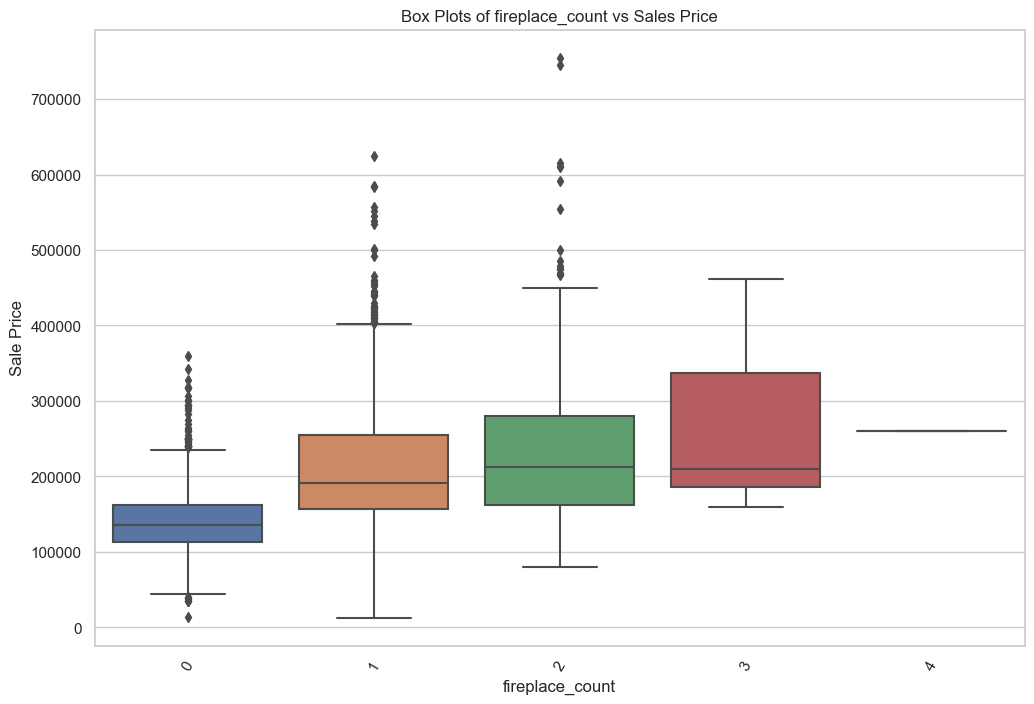

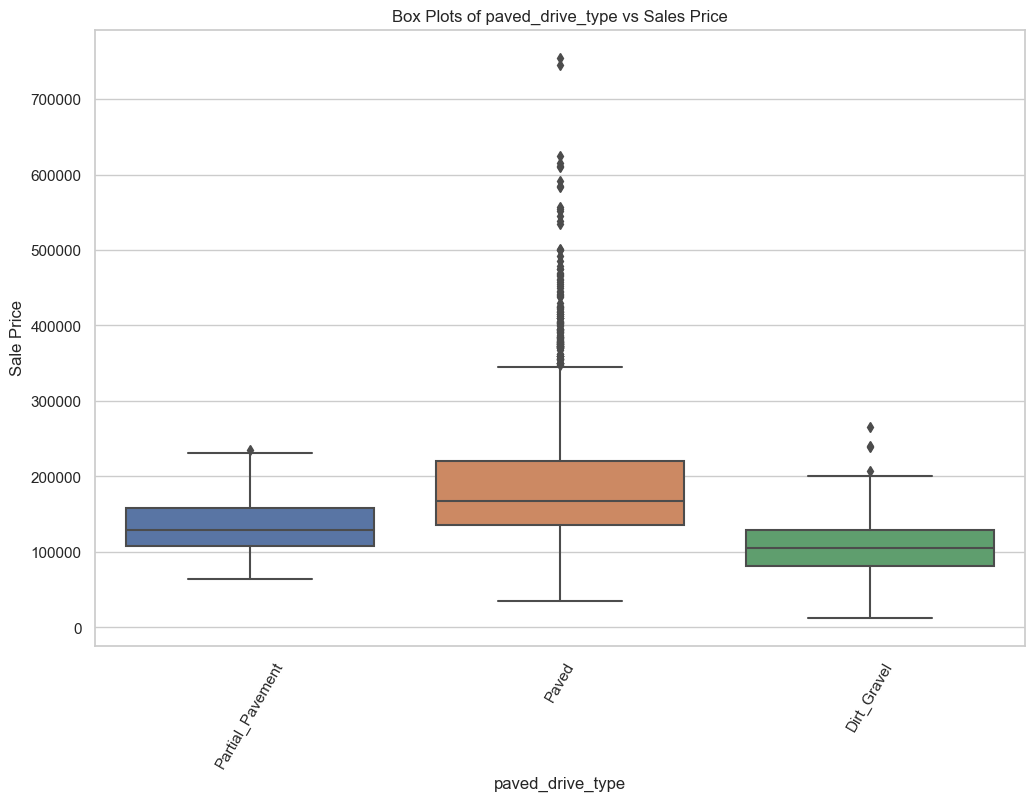

In [39]:
# Box Plots of house type vs Sales Price
plt.figure(figsize=(12, 8))
sns.boxplot(x='dwelling_style', y='sale_price', data=df)
plt.title('Box Plots of house type vs Sales Price')
plt.xlabel('house type')
plt.ylabel('Sale Price')
plt.xticks(rotation=60)
plt.show()

# Box Plots of fireplace_count vs Sales Price
plt.figure(figsize=(12, 8))
sns.boxplot(x='fireplace_count', y='sale_price', data=df)
plt.title('Box Plots of fireplace_count vs Sales Price')
plt.xlabel('fireplace_count')
plt.ylabel('Sale Price')
plt.xticks(rotation=60)
plt.show()

# Box Plots of paved_drive_type vs Sales Price
plt.figure(figsize=(12, 8))
sns.boxplot(x='paved_drive_type', y='sale_price', data=df)
plt.title('Box Plots of paved_drive_type vs Sales Price')
plt.xlabel('paved_drive_type')
plt.ylabel('Sale Price')
plt.xticks(rotation=60)
plt.show()

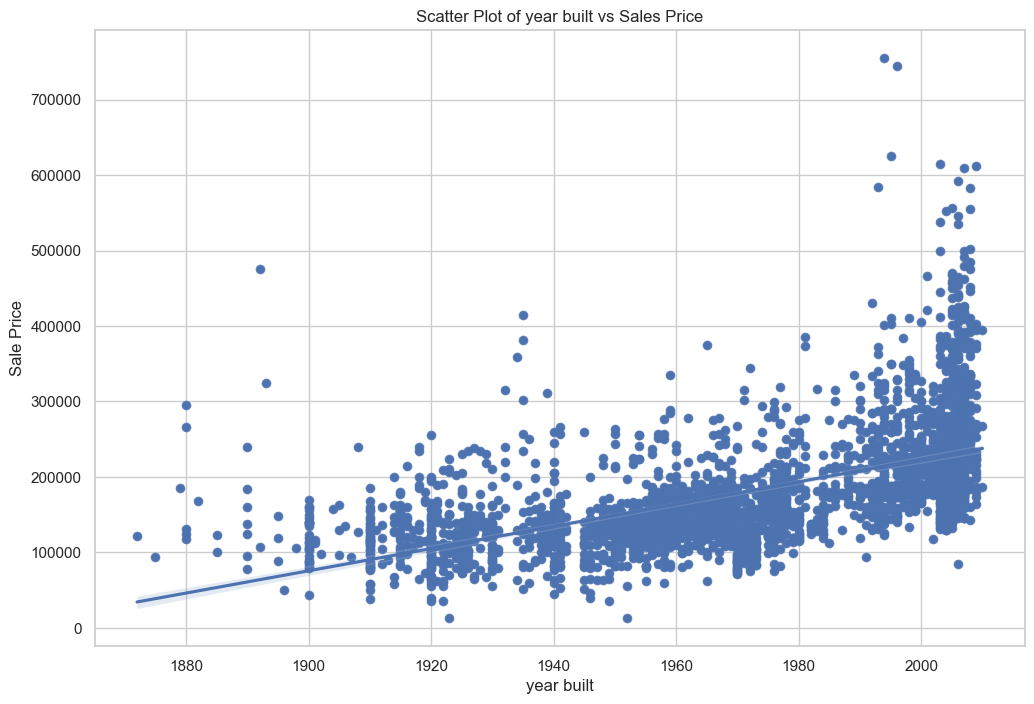

In [34]:
# scatter Plots of year built vs Sales Price

plt.figure(figsize=(12, 8))
sns.scatterplot(x='year_built', y='sale_price', data=df)
sns.regplot(x='year_built', y='sale_price', data=df)
plt.title('Scatter Plot of year built vs Sales Price')
plt.xlabel('year built')
plt.ylabel('Sale Price')
plt.show()